# Deviation from Normality

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import edhec_risk_kit as erk 

In [3]:
hfi=erk.get_hfi_returns()["2009":"2018"]
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2009-01,0.0491,-0.0016,0.0082,-0.0112,0.0079,0.0132,0.0112,0.0029,-0.0017,0.0056,0.0100,0.0282,0.0060
2009-02,0.0164,-0.0031,-0.0122,-0.0133,-0.0046,-0.0091,0.0065,-0.0055,-0.0161,0.0006,-0.0016,0.0328,-0.0037
2009-03,0.0235,-0.0180,0.0022,0.0350,0.0021,0.0117,0.0057,0.0048,0.0188,0.0125,0.0100,-0.0462,0.0008
2009-04,0.0500,-0.0140,0.0387,0.0663,-0.0012,0.0337,0.0221,0.0127,0.0375,0.0081,0.0342,-0.0820,0.0092
2009-05,0.0578,0.0213,0.0504,0.0884,0.0146,0.0442,0.0365,0.0348,0.0516,0.0107,0.0392,0.0008,0.0312


In [4]:
pd.concat([hfi.mean(),hfi.median(),hfi.mean()>hfi.median()],axis="columns")

,0,1,2
Convertible Arbitrage,0.006623,0.0045,True
CTA Global,0.000497,-0.0003,True
Distressed Securities,0.006559,0.0082,False
Emerging Markets,0.005205,0.0061,False
Equity Market Neutral,0.002556,0.0032,False
Event Driven,0.005595,0.0070,False
Fixed Income Arbitrage,0.005478,0.0050,True
Global Macro,0.002676,0.0020,True
Long/Short Equity,0.005209,0.0064,False
Merger Arbitrage,0.003716,0.0047,False


$$ S(R)=\frac{E[ (R-E(R))^3]}{\sigma_R^3} $$

In [5]:
erk.skewness(hfi).sort_values()

Equity Market Neutral    -0.896327
Funds Of Funds           -0.646908
Merger Arbitrage         -0.551065
Event Driven             -0.488821
Long/Short Equity        -0.463703
Distressed Securities    -0.254944
Emerging Markets          0.033123
CTA Global                0.052062
Relative Value            0.159953
Global Macro              0.348184
Short Selling             0.456518
Fixed Income Arbitrage    1.121453
Convertible Arbitrage     1.305911
dtype: float64

In [6]:
import scipy.stats 

In [7]:
scipy.stats.skew(hfi)

array([ 1.30591093,  0.05206195, -0.25494434,  0.03312287, -0.89632731,
       -0.48882095,  1.12145348,  0.34818394, -0.46370341, -0.55106451,
        0.15995286,  0.45651822, -0.64690778])

In [8]:
import numpy as np

In [9]:
normal_rets=np.random.normal(0,.15,size=(26300,1))
erk.skewness(normal_rets)

-0.029555996316637176

# Kurtosis

$$ K(R)=\frac{E[ (R-E(R))^4]}{\sigma_R^4} $$

In [10]:
erk.kurtosis(hfi).sort_values()

CTA Global                2.591087
Merger Arbitrage          2.715238
Global Macro              3.164362
Distressed Securities     3.319725
Event Driven              3.620617
Funds Of Funds            3.816132
Long/Short Equity         4.115713
Short Selling             4.175832
Emerging Markets          4.401636
Relative Value            4.512482
Equity Market Neutral     5.071677
Fixed Income Arbitrage    6.406941
Convertible Arbitrage     6.775731
dtype: float64

In [11]:
scipy.stats.jarque_bera(normal_rets)

(4.397202253298825, 0.11095826641069206)

In [12]:
scipy.stats.jarque_bera(hfi)

(1885.0544854827647, 0.0)

In [13]:
erk.is_normal(normal_rets)

True

In [14]:
hfi.aggregate(erk.is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities      True
Emerging Markets          False
Equity Market Neutral     False
Event Driven               True
Fixed Income Arbitrage    False
Global Macro               True
Long/Short Equity         False
Merger Arbitrage           True
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

# Downside Measure!

In [15]:
%matplotlib inline

# Semideviation

In [16]:
hfi.std(ddof=0)

Convertible Arbitrage     0.013635
CTA Global                0.019759
Distressed Securities     0.015725
Emerging Markets          0.023461
Equity Market Neutral     0.006164
Event Driven              0.014651
Fixed Income Arbitrage    0.007617
Global Macro              0.010337
Long/Short Equity         0.016837
Merger Arbitrage          0.006441
Relative Value            0.009470
Short Selling             0.034161
Funds Of Funds            0.010691
dtype: float64

In [17]:
x=erk.semideviation(hfi).sort_values()
x


Fixed Income Arbitrage    0.003321
Merger Arbitrage          0.003611
Global Macro              0.005075
Equity Market Neutral     0.005186
Relative Value            0.005711
Convertible Arbitrage     0.006681
Funds Of Funds            0.007948
Distressed Securities     0.009498
Event Driven              0.010135
CTA Global                0.010996
Long/Short Equity         0.012139
Emerging Markets          0.015276
Short Selling             0.021240
dtype: float64

# VaR and CVar

value At Risk

-Historic VaR
-Parametric VaR - Gaussian
-Modified Cornish-Fisher VaR 

In [18]:
 np.percentile(hfi,5,axis=0)

array([-0.00966, -0.02812, -0.01936, -0.03273, -0.0077 , -0.02498,
       -0.00548, -0.01321, -0.02385, -0.00791, -0.01021, -0.0654 ,
       -0.01786])

In [32]:
erk.var_historic(hfi["2000":],1)

Convertible Arbitrage     0.023108
CTA Global                0.034228
Distressed Securities     0.034840
Emerging Markets          0.052182
Equity Market Neutral     0.016064
Event Driven              0.033146
Fixed Income Arbitrage    0.009948
Global Macro              0.017600
Long/Short Equity         0.041758
Merger Arbitrage          0.011828
Relative Value            0.019502
Short Selling             0.082492
Funds Of Funds            0.026846
dtype: float64

In [20]:
from scipy.stats import norm

In [21]:
z=norm.ppf(.05)

In [22]:
-(hfi.mean()+z*hfi.std(ddof=0))

Convertible Arbitrage     0.015805
CTA Global                0.032004
Distressed Securities     0.019306
Emerging Markets          0.033385
Equity Market Neutral     0.007582
Event Driven              0.018503
Fixed Income Arbitrage    0.007050
Global Macro              0.014327
Long/Short Equity         0.022484
Merger Arbitrage          0.006878
Relative Value            0.010125
Short Selling             0.066540
Funds Of Funds            0.015116
dtype: float64

In [29]:
erk.var_gaussian(hfi["2000":],1,True)

Convertible Arbitrage     0.015289
CTA Global                0.042804
Distressed Securities     0.033761
Emerging Markets          0.056480
Equity Market Neutral     0.016966
Event Driven              0.034562
Fixed Income Arbitrage    0.008421
Global Macro              0.018650
Long/Short Equity         0.042728
Merger Arbitrage          0.012713
Relative Value            0.018722
Short Selling             0.085065
Funds Of Funds            0.027843
dtype: float64

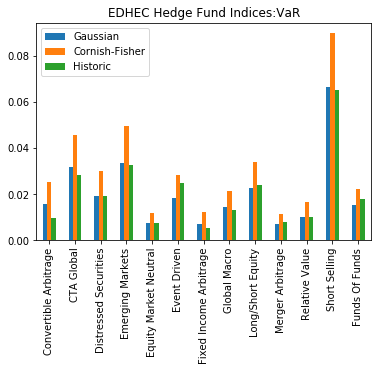

In [24]:
var_List=[erk.var_gaussian(hfi),erk.var_gaussian(hfi,True),erk.var_historic(hfi)]
comparison=pd.concat(var_List,axis=1)
comparison.columns=["Gaussian","Cornish-Fisher","Historic"]
comparison.plot.bar(title="EDHEC Hedge Fund Indices:VaR")

# Beyond aka CVar

In [25]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.018433
CTA Global                0.036517
Distressed Securities     0.028033
Emerging Markets          0.048117
Equity Market Neutral     0.014350
Event Driven              0.030333
Fixed Income Arbitrage    0.008767
Global Macro              0.016967
Long/Short Equity         0.039233
Merger Arbitrage          0.010817
Relative Value            0.015533
Short Selling             0.078467
Funds Of Funds            0.025383
dtype: float64